<a href="https://colab.research.google.com/github/yeonmi02/mlproject/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet --quiet

In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#예제용 데이터 생성 (날짜 + 선형 트렌드 + 계절성)

np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=200)
y = 10 + 0.1 * np.arange(200) + 3 * np.sin(2 * np.pi * np.arange(200)/30) + np.random.normal(0, 0.5, 200)

df = pd.DataFrame({'ds': dates, 'y': y})

# Prophet 모델 정의 및 학습
model = Prophet()
model.fit(df)

# 미래 데이터프레임 생성 및 예측
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptu5p1n86/p5m4_k_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptu5p1n86/kx8hger4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18057', 'data', 'file=/tmp/tmptu5p1n86/p5m4_k_5.json', 'init=/tmp/tmptu5p1n86/kx8hger4.json', 'output', 'file=/tmp/tmptu5p1n86/prophet_modelbz__6e3y/prophet_model-20250531072333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


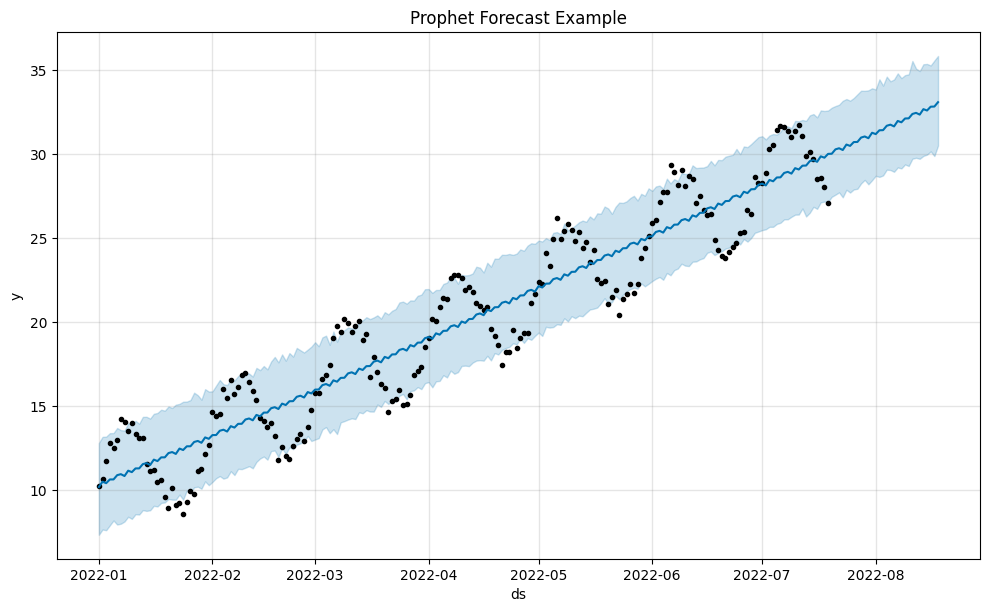

In [7]:
#  결과 시각화
fig1 = model.plot(forecast)
plt.title("Prophet Forecast Example")
plt.show()

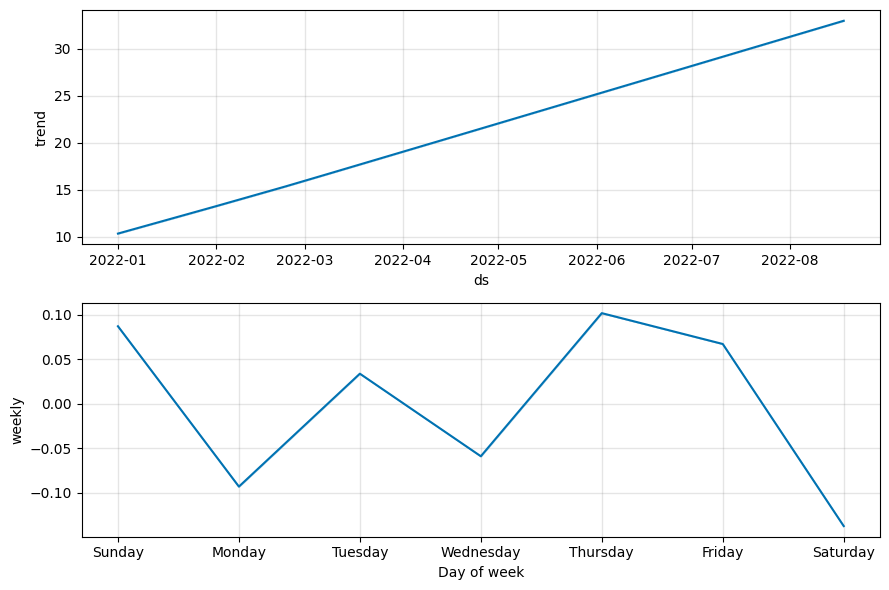

In [8]:
# 성분별 시각화 (트렌드/계절성 등)
fig2 = model.plot_components(forecast)
plt.show()